In [1]:
# Executive summary:
# EDA and apply machine learning models by creating a predictive model
# Data visualization on different features
# Load datasets
# Data wrangling
# Comparison of ML model results

In [2]:
# Introduction/background:
# I'm performing exploratory data analysis and apply machine learning models to build a
# predictive model on what sorts of people were more likely to survive during the fall of Titanic

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# load dataset
gender = pd.read_csv('gender_submission.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
gender

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [5]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
# get info
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# use describe method to look at stats
gender.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [11]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# Check if there are any missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

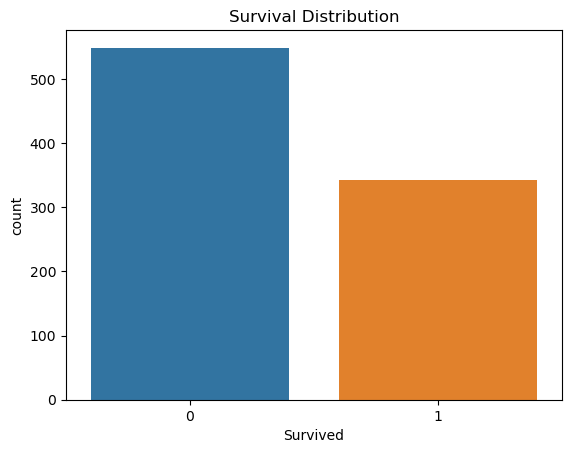

In [14]:
# Data visualization
sns.countplot(x ='Survived', data = train)
plt.title('Survival Distribution')
plt.show()

In [15]:
print(train.Survived.sum()/train.Survived.count())

0.3838383838383838


In [16]:
# 38% survived which means more people died than survived

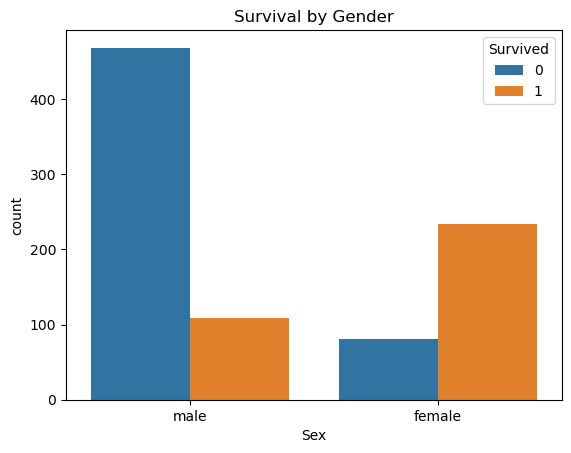

In [17]:
sns.countplot(x ='Sex', hue ='Survived', data = train)
plt.title('Survival by Gender')
plt.show()

In [18]:
train.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

In [19]:
# Calculate the % of women and men survived
print("% of women survived: " , train[train.Sex == 'female'].Survived.sum()/train[train.Sex == 'female'].Survived.count())
print("% of men survived:   " , train[train.Sex == 'male'].Survived.sum()/train[train.Sex == 'male'].Survived.count())

% of women survived:  0.7420382165605095
% of men survived:    0.18890814558058924


In [20]:
# Females are more likely to survive than males

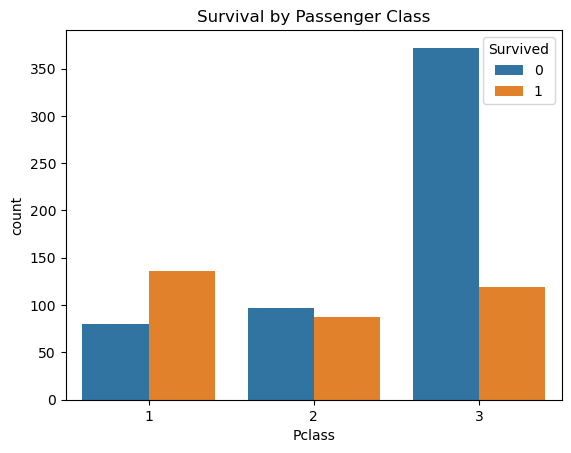

In [21]:
sns.countplot(x = 'Pclass', hue ='Survived', data=train)
plt.title('Survival by Passenger Class')
plt.show()

In [22]:
# Calculate the % of survivals
print("% of survivals in") 
print("Pclass=1 : ", train.Survived[train.Pclass == 1].sum()/train[train.Pclass == 1].Survived.count())
print("Pclass=2 : ", train.Survived[train.Pclass == 2].sum()/train[train.Pclass == 2].Survived.count())
print("Pclass=3 : ", train.Survived[train.Pclass == 3].sum()/train[train.Pclass == 3].Survived.count())

% of survivals in
Pclass=1 :  0.6296296296296297
Pclass=2 :  0.47282608695652173
Pclass=3 :  0.24236252545824846


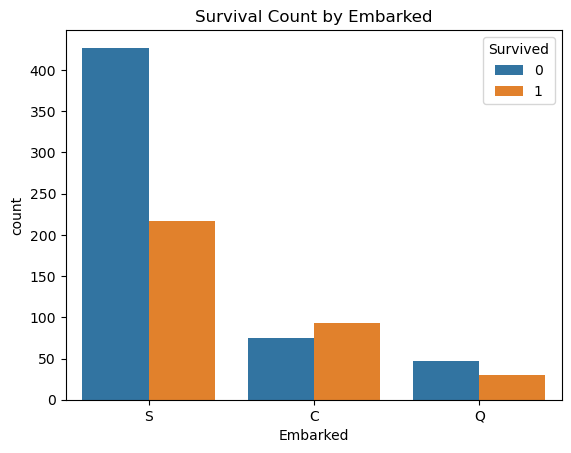

In [23]:
sns.countplot(x = 'Embarked', hue = 'Survived', data = train)
plt.title('Survival Count by Embarked')
plt.show()

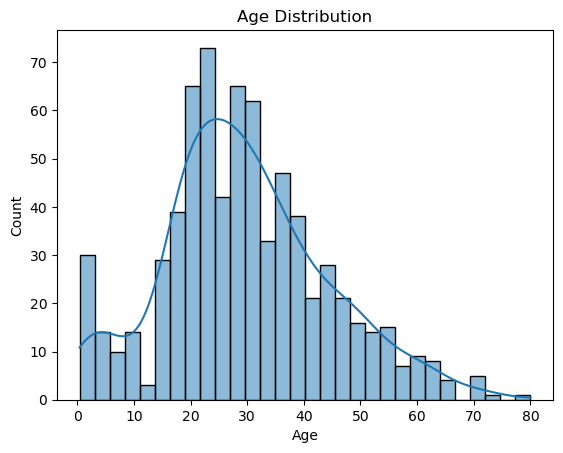

In [24]:
sns.histplot(train['Age'].dropna(), kde = True, bins = 30)
plt.title('Age Distribution')
plt.show()

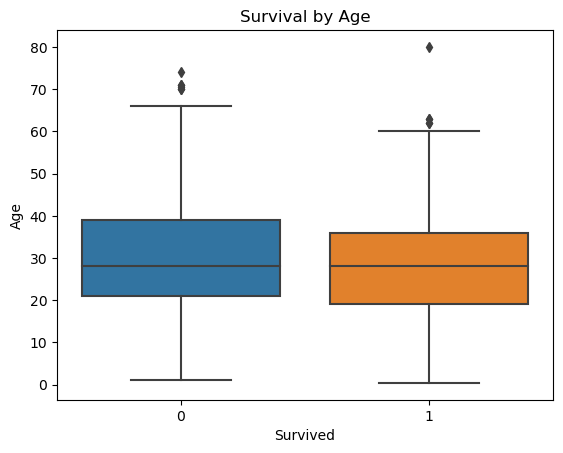

In [25]:
sns.boxplot(x = 'Survived', y = 'Age', data = train)
plt.title('Survival by Age')
plt.show()

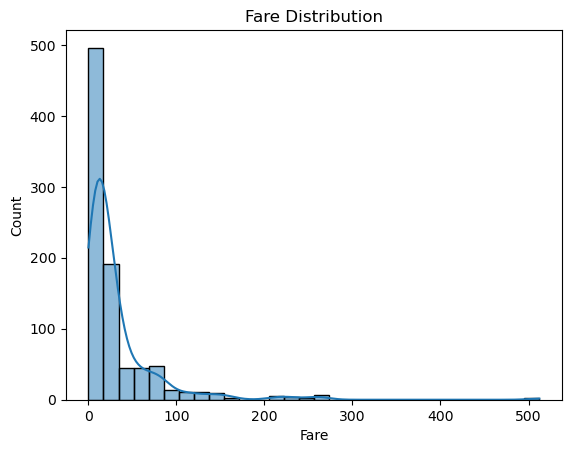

In [26]:
sns.histplot(train['Fare'], kde=True, bins=30)
plt.title('Fare Distribution')
plt.show()

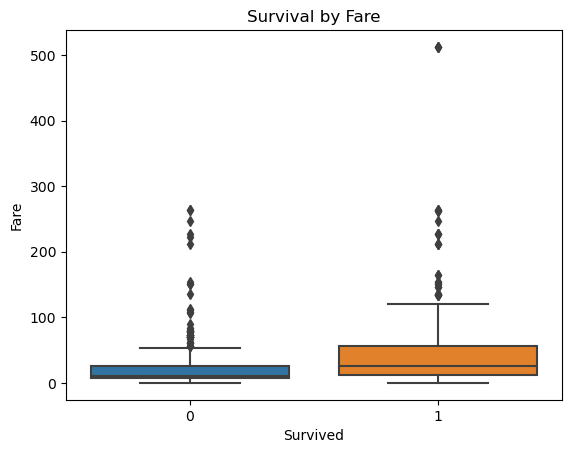

In [27]:
sns.boxplot(x = 'Survived', y = 'Fare', data = train)
plt.title('Survival by Fare')
plt.show()

In [28]:
# Data preprocessing and fill missing values
train['Age'].fillna(train['Age'].median(), inplace = True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)
train.drop(columns = ['Cabin'], inplace = True)

In [29]:
# Convert catagorical features to numeric
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
train = pd.get_dummies(train, columns=['Embarked'], drop_first = True)

In [30]:
# Drop irrelevant columns
train.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

In [31]:
print(train.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    0  22.0      1      0   7.2500           0           1
1         1       1    1  38.0      1      0  71.2833           0           0
2         1       3    1  26.0      0      0   7.9250           0           1
3         1       1    1  35.0      1      0  53.1000           0           1
4         0       3    0  35.0      0      0   8.0500           0           1


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [33]:
# Split the data into training and validation sets
X = train.drop(columns=['Survived'])
y = train['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [35]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

In [36]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}

In [37]:
for name, clf in classifiers.items():
    cv_results = cross_val_score(clf, X, y, cv=skf, scoring='accuracy')
    results[name] = cv_results
    print(f"{name}: {cv_results.mean():.4f} (+/- {cv_results.std():.4f})")


c:\Users\andre\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\andre\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression: 0.7924 (+/- 0.0174)
Random Forest: 0.8238 (+/- 0.0296)
Support Vector Machine: 0.6767 (+/- 0.0150)


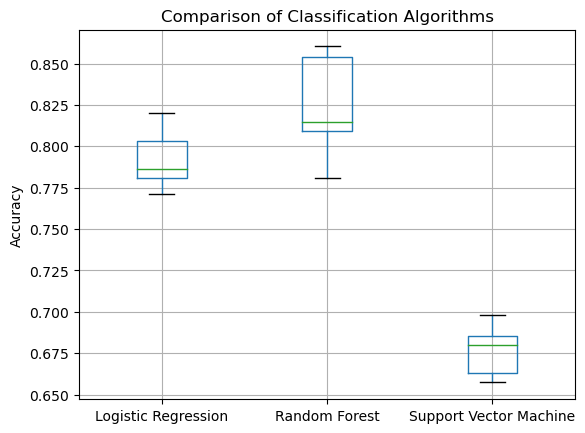

In [38]:
results_df = pd.DataFrame(results)
results_df.boxplot()
plt.title('Comparison of Classification Algorithms')
plt.ylabel('Accuracy')
plt.show()

In [39]:
best_model_name = results_df.mean().idxmax()
best_model = classifiers[best_model_name]
print(f"Best model: {best_model_name}")

Best model: Random Forest


In [40]:
best_model.fit(X, y)

RandomForestClassifier()

In [41]:
test['Age'].fillna(test['Age'].median(), inplace = True)
test['Fare'].fillna(test['Fare'].median(), inplace = True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace = True)
test.drop(columns=['Cabin'], inplace = True)

In [42]:
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})
test = pd.get_dummies(test, columns=['Embarked'], drop_first=True)

In [43]:
test.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)
X_test = scaler.transform(test)

In [44]:
y_test_pred = best_model.predict(X_test)

c:\Users\andre\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [45]:
train_ml = train.copy()
test_ml = test.copy()

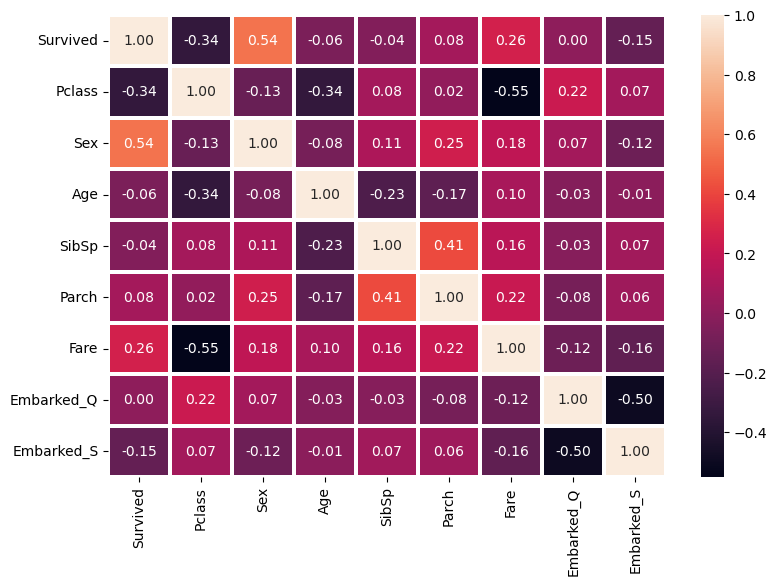

In [46]:
# Display heatmap
corr = train_ml.corr()

f,ax = plt.subplots(figsize = (9,6))
sns.heatmap(corr, annot = True, linewidths = 1.5 , fmt = '.2f', ax = ax)
plt.show()

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# for train_ml
scaler.fit(train_ml.drop('Survived',axis=1))
scaled_features = scaler.transform(train_ml.drop('Survived',axis=1))
train_ml_sc = pd.DataFrame(scaled_features, columns=train_ml.columns[:-1])

# for test_ml
test_ml.fillna(test_ml.mean(), inplace=True)
# scaler.fit(test_ml)
scaled_features = scaler.transform(test_ml)
df_test_ml_sc = pd.DataFrame(scaled_features, columns=test_ml.columns)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_ml.drop('Survived',axis=1), train_ml['Survived'], test_size=0.30, random_state=101)
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(train_ml_sc, train_ml['Survived'], test_size=0.30, random_state=101)

In [49]:
# unscaled
X_train_all = train_ml.drop('Survived',axis=1)
y_train_all = train_ml['Survived']
X_test_all = test_ml

# scaled
X_train_all_sc = train_ml_sc
y_train_all_sc = train_ml['Survived']
X_test_all_sc = df_test_ml_sc

In [50]:
X_test_all.fillna(X_test_all.mean(), inplace=True)
print("*")

*


In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [52]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_val)
pred_logreg = logreg.predict(X_test)
print(confusion_matrix(y_test, pred_logreg))
print(classification_report(y_test, pred_logreg))
print(accuracy_score(y_test, pred_logreg))

[[135  19]
 [ 38  76]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       154
           1       0.80      0.67      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268

0.7873134328358209


c:\Users\andre\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\andre\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [53]:
logreg.fit(X_train_all, y_train_all)
pred_all_logreg = logreg.predict(X_test_all)

c:\Users\andre\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [55]:
pred_dtree = dtree.predict(X_test)
print(classification_report(y_test,pred_dtree))
print(accuracy_score(y_test, pred_dtree))

              precision    recall  f1-score   support

           0       0.77      0.86      0.82       154
           1       0.78      0.66      0.71       114

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.77       268

0.7761194029850746


In [56]:
dtree_2 = DecisionTreeClassifier(max_features = 7 , max_depth = 6,  min_samples_split = 8)
dtree_2.fit(X_train,y_train)
pred_dtree_2 = dtree_2.predict(X_test)
print(classification_report(y_test, pred_dtree_2))
print(accuracy_score(y_test, pred_dtree_2))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       154
           1       0.88      0.59      0.71       114

    accuracy                           0.79       268
   macro avg       0.82      0.76      0.77       268
weighted avg       0.81      0.79      0.78       268

0.7910447761194029


In [57]:
dtree_2.fit(X_train_all, y_train_all)
pred_all_dtree2 = dtree_2.predict(X_test_all)

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=6, max_features=7)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features=7)

In [59]:
pred_rfc = rfc.predict(X_test)
print(confusion_matrix(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))
print(accuracy_score(y_test, pred_rfc))

[[141  13]
 [ 39  75]]
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       154
           1       0.85      0.66      0.74       114

    accuracy                           0.81       268
   macro avg       0.82      0.79      0.79       268
weighted avg       0.81      0.81      0.80       268

0.8059701492537313


In [60]:
rfc.fit(X_train_all, y_train_all)
pred_all_rfc = rfc.predict(X_test_all)

In [61]:
from sklearn.svm import SVC
svc = SVC(gamma = 0.01, C = 100)#, probability=True)
svc.fit(X_train_sc, y_train_sc)

SVC(C=100, gamma=0.01)

In [62]:
pred_svc = svc.predict(X_test_sc)
print(confusion_matrix(y_test_sc, pred_svc))
print(classification_report(y_test_sc, pred_svc))
print(accuracy_score(y_test_sc, pred_svc))

[[143  11]
 [ 37  77]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.86       154
           1       0.88      0.68      0.76       114

    accuracy                           0.82       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.83      0.82      0.82       268

0.8208955223880597


In [63]:
from sklearn.model_selection import cross_val_score

In [64]:
# SVM classifier
scores_svc = cross_val_score(svc, X_train_all_sc, y_train_all_sc, cv=10, scoring='accuracy')
print(scores_svc)
print(scores_svc.mean())

[0.84444444 0.84269663 0.7752809  0.86516854 0.85393258 0.79775281
 0.83146067 0.7752809  0.8988764  0.85393258]
0.8338826466916354


In [65]:
# Random Forest classifier
scores_rfc = cross_val_score(rfc, X_train_all_sc, y_train_all_sc, cv=10, scoring='accuracy')
print(scores_rfc)
print(scores_rfc.mean())

[0.77777778 0.83146067 0.74157303 0.91011236 0.91011236 0.84269663
 0.79775281 0.78651685 0.87640449 0.83146067]
0.8305867665418228


In [66]:
# DecisionTreeClassifier
scores_dtree_2 = cross_val_score(dtree_2, X_train_all_sc, y_train_all_sc, cv=10, scoring='accuracy')
print(scores_dtree_2)
print(scores_dtree_2.mean())

[0.76666667 0.86516854 0.73033708 0.80898876 0.85393258 0.83146067
 0.78651685 0.7752809  0.86516854 0.83146067]
0.811498127340824


In [67]:
print("dtree_2 : " , scores_dtree_2.mean())
print("rfc     : " , scores_rfc.mean())
print("svc     : " , scores_svc.mean())

dtree_2 :  0.811498127340824
rfc     :  0.8305867665418228
svc     :  0.8338826466916354


In [68]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)

c:\Users\andre\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [69]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_val)

c:\Users\andre\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [70]:
# Evaluate models
print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_logreg))
print("Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf))
print("SVM Accuracy:", accuracy_score(y_val, y_pred_svc))

Logistic Regression Accuracy: 0.6424581005586593
Random Forest Accuracy: 0.7821229050279329
SVM Accuracy: 0.5865921787709497


In [71]:
print("\nLogistic Regression Report\n", classification_report(y_val, y_pred_logreg))
print("\nRandom Forest Report\n", classification_report(y_val, y_pred_rf))
print("\nSVM Report\n", classification_report(y_val, y_pred_svc))


Logistic Regression Report
               precision    recall  f1-score   support

           0       0.87      0.46      0.60       105
           1       0.54      0.91      0.68        74

    accuracy                           0.64       179
   macro avg       0.71      0.68      0.64       179
weighted avg       0.74      0.64      0.63       179


Random Forest Report
               precision    recall  f1-score   support

           0       0.84      0.78      0.81       105
           1       0.72      0.78      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179


SVM Report
               precision    recall  f1-score   support

           0       0.59      1.00      0.74       105
           1       0.00      0.00      0.00        74

    accuracy                           0.59       179
   macro avg       0.29      0.50      0.37       179
weighted 

c:\Users\andre\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\andre\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\andre\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
y_test_pred = rf.predict(X_test)

In [73]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)


train.shape
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,1


In [74]:
# A survey of what others have done in this area:
# The others plot of kinds of visualization charts like pie charts, catplots, distplots, crosstab
# Other ML models like Gaussian Naive Bayes model, KNN - KNeighborsClassifier, featured engineering, xgboost, etc 

In [75]:
# Conclusion:
# I learned how to apply the EDA with Pandas and Matplotlib and the foundations for appying the ML classification models
# of the scikit learn library. BY EDA, I found a strong impact of features like Embarked , Age, and Sex.
# Built model with Pandas
# I created a dataset that uses sklearn Classifiers for prediction
# Deciding by k fold corss validation score
# Best ML models are SVC, Random Forest, and Decision Tree

In [76]:
# References:
# CIS 051: Data Analysis and 053: Machine Learning at Mission College with professor Jahan
# MATH 80: Foundations of Data Science at West Valley College with professor Fatemeh Yarahmadi
# Datacamp Kaggle Tutorial: EDA & Machine Learning
# Youtube videos on Data science and Machine Learning: freeCodeCamp.org and Machine Learning Center, Data School